In [1]:
# Packages
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import matplotlib as mpl
label_size = 8
mpl.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10

import wrangle

In [ ]:
# Create an array with the colors you want to use
heat = [ 'pink', 'gold', 'darkturquoise', 'red', 'black']
# Set your custom color palette
my_pal = sns.color_palette(heat)
sns.palplot(my_pal)

In [2]:
# acquire data
df = pd.read_csv("train_maybe_final.csv")

In [3]:
df.type.value_counts()

Game          2652615
Activity      2059975
Assessment     534494
Clip            63522
Name: type, dtype: int64

In [4]:
df.shape

(5310606, 19)

In [8]:
df.installation_id.nunique()

3485

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310606 entries, 0 to 5310605
Data columns (total 19 columns):
Unnamed: 0         int64
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
num_correct        float64
num_incorrect      float64
accuracy           float64
accuracy_group     float64
date               object
hour               int64
weekday            object
dtypes: float64(4), int64(5), object(10)
memory usage: 769.8+ MB


In [7]:
df.head(5)

,Unnamed: 0,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [5]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
df = df[df.world != "NONE"]

In [7]:
df.shape

(5305297, 18)

In [86]:
agg = df.groupby(['installation_id','world'])[['game_session']].count()

In [87]:
agg

game_session
installation_id world                     
0006a69f        MAGMAPEAK              725
                TREETOPCITY           1878
0006c192        CRYSTALCAVES           204
                MAGMAPEAK             1336
                TREETOPCITY            664
...                                    ...
ffc90c32        TREETOPCITY            684
ffd2871d        MAGMAPEAK              927
ffeb0b1b        CRYSTALCAVES           944
                MAGMAPEAK              534
                TREETOPCITY            112

[8185 rows x 1 columns]

In [88]:
agg = agg.reset_index()

In [89]:
agg

,installation_id,world,game_session
0,0006a69f,MAGMAPEAK,725
1,0006a69f,TREETOPCITY,1878
2,0006c192,CRYSTALCAVES,204
3,0006c192,MAGMAPEAK,1336
4,0006c192,TREETOPCITY,664
...,...,...,...
8180,ffc90c32,TREETOPCITY,684
8181,ffd2871d,MAGMAPEAK,927
8182,ffeb0b1b,CRYSTALCAVES,944
8183,ffeb0b1b,MAGMAPEAK,534


In [90]:
agg = agg.pivot(index = 'installation_id', columns = 'world').fillna(0).reset_index()

In [91]:
agg

installation_id game_session                      
world                 CRYSTALCAVES MAGMAPEAK TREETOPCITY
0            0006a69f          0.0     725.0      1878.0
1            0006c192        204.0    1336.0       664.0
2            00129856          0.0       0.0        43.0
3            001d0ed0        246.0       0.0       159.0
4            00225f67          0.0       0.0       636.0
...               ...          ...       ...         ...
3518         ff9305d7        344.0     680.0      1030.0
3519         ff9715db        464.0     928.0       544.0
3520         ffc90c32        489.0     827.0       684.0
3521         ffd2871d          0.0     927.0         0.0
3522         ffeb0b1b        944.0     534.0       112.0

[3523 rows x 4 columns]

In [92]:
agg.columns = ['installation_id', 'Crystalcaves', 'Magamapeak', 'Treetopcity']

In [93]:
agg.set_index('installation_id', inplace = True)

In [15]:
agg.to_csv('practice_counts.csv')

Text(0.5, 1.0, 'What are the usage distributions (ratio) for each world?')

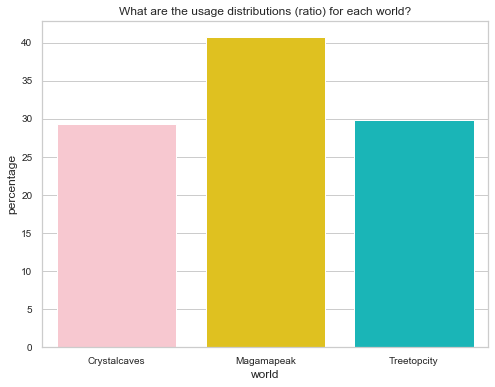

In [16]:
plt.figure(figsize=(8,6))

c = agg.sum(axis = 0)
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
pcts.columns = ['world', 'percentage']
(sns.barplot(x = "world" , y="percentage", data=pcts, palette=my_pal))
#plt.legend(title='World', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("What are the usage distributions (ratio) for each world?")

# Magamapeak > most frequently visited world 

In [17]:
agg.sort_values(by = ['Magamapeak','Treetopcity','Crystalcaves'], ascending = False, inplace = True)

In [18]:
agg = agg.reset_index()

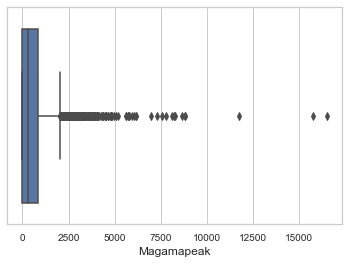

In [19]:
sns.boxplot(agg.Magamapeak)

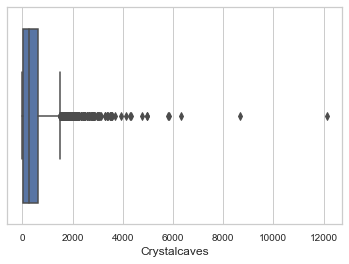

In [20]:
sns.boxplot(agg.Crystalcaves)

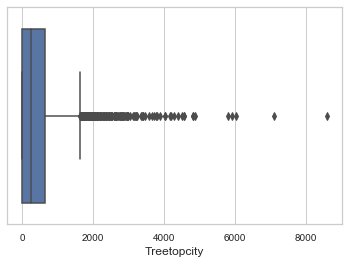

In [21]:
sns.boxplot(agg.Treetopcity)

In [22]:
agg.Crystalcaves.median()

258.0

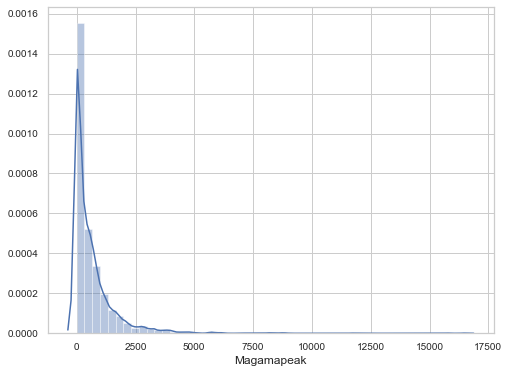

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(agg.Magamapeak)

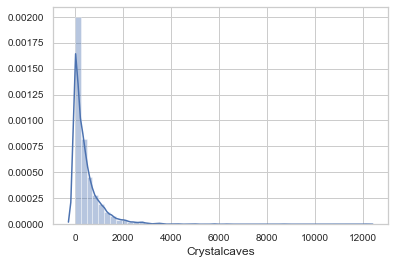

In [24]:
sns.distplot(agg.Crystalcaves)

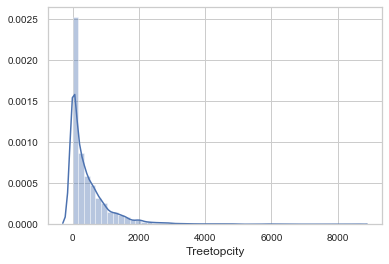

In [25]:
sns.distplot(agg.Treetopcity)

In [26]:
(df.groupby(["world","type"])["game_session"].count())

world         type      
CRYSTALCAVES  Activity       358980
              Assessment     288231
              Clip            21834
              Game           944823
MAGMAPEAK     Activity       994084
              Assessment     143216
              Clip            11703
              Game          1097999
TREETOPCITY   Activity       705527
              Assessment     308534
              Clip            24635
              Game           608150
Name: game_session, dtype: int64

Text(0.5, 1.0, 'What are the most visited engagement types in the game?')

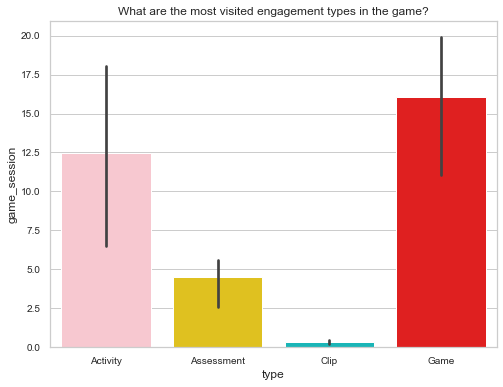

In [27]:
plt.figure(figsize=(8,6))

c = (df.groupby(["world","type"])["game_session"].count())
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x = "type" , y="game_session", data=pcts, palette=my_pal))

plt.title("What are the most visited engagement types in the game?")

# overall, games and activities are much more used than assessments

In [28]:
# top 5 most played missions
pcts[pcts.game_session >= 4.5].sort_values('game_session', ascending = False)

,world,type,game_session
7,MAGMAPEAK,Game,19.935650
4,MAGMAPEAK,Activity,18.048934
3,CRYSTALCAVES,Game,17.154534
8,TREETOPCITY,Activity,12.809793
11,TREETOPCITY,Game,11.041782
0,CRYSTALCAVES,Activity,6.517765
9,TREETOPCITY,Assessment,5.601850
1,CRYSTALCAVES,Assessment,5.233222


Text(0.5, 1.0, 'The most used missions in each world & engagement type (only showing record of >3.5% usage)?')

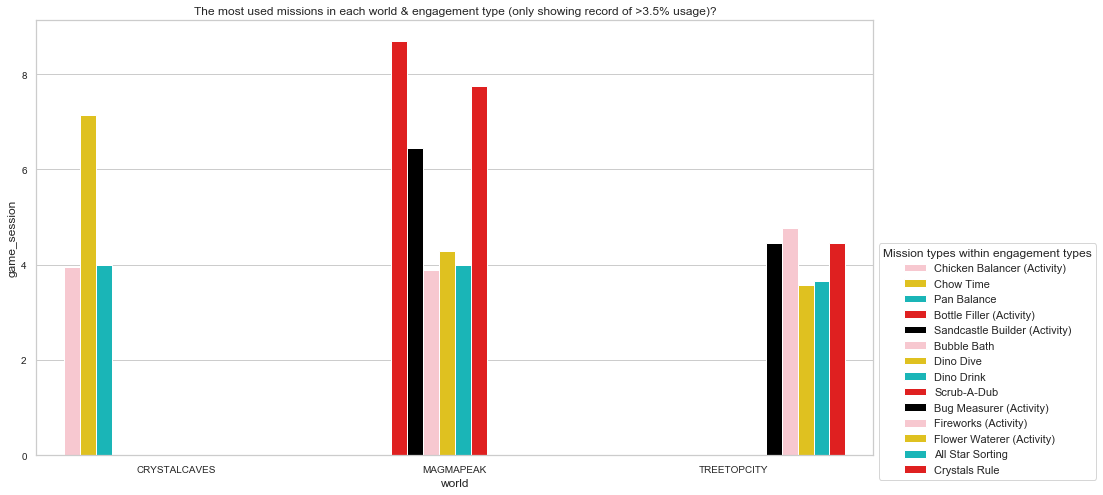

In [29]:
plt.figure(figsize=(15,8))

c = (df.groupby(["world", "type", "title"])["game_session"].count())
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
pcts = pcts[pcts.game_session >= 3.5]
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x = "world" , y="game_session", data=pcts,  hue = "title",palette=my_pal))
plt.legend(title='Mission types within engagement types', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title("The most used missions in each world & engagement type (only showing record of >3.5% usage)?")


In [30]:
# look at a ratio of total game time:total clicks

In [36]:
# import Faith's game time dadaset, note that game_time does not include time for clips
game_time = pd.read_csv('game_mins.csv')

In [40]:
game_time.drop(columns = 'Unnamed: 0', inplace = True)

In [41]:
game_time.head()

,installation_id,activity_mins,assessment_mins,game_mins
0,0006a69f,40.428983,3.940483,21.988250
1,0006c192,20.175500,5.384350,8.822533
2,00129856,0.000000,0.662367,0.000000
3,001d0ed0,0.477983,3.319300,4.459850
4,00225f67,3.612000,0.593950,5.462883


In [42]:
df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
5,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:18.474000+00:00,"{""coordinates"":{""x"":863,""y"":237,""stage_width"":...",0006a69f,4,4070,3937,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [77]:
# in each user account, how many games did they play, and how many actions did they actually do?
action = df.groupby(['installation_id','game_session', 'type']).event_id.count().reset_index()

In [81]:
act = action.drop(columns = 'game_session')

In [95]:
act

,installation_id,type,event_id
0,0006a69f,Game,131
1,0006a69f,Activity,84
2,0006a69f,Clip,1
3,0006a69f,Game,64
4,0006a69f,Clip,1
...,...,...,...
119709,ffeb0b1b,Activity,76
119710,ffeb0b1b,Clip,1
119711,ffeb0b1b,Clip,1
119712,ffeb0b1b,Game,604


In [94]:
agg = agg.pivot(index = 'installation_id', columns = 'world').fillna(0).reset_index()
act.pivot(index = 'installation_id', columns = '')

KeyError: 'None of [None] are in the columns'

In [84]:
med = act.event_id.median()

In [85]:
Q1 = 

3.0

In [83]:
action = action.pivot(index = 'installation_id', columns = 'type').fillna(0).reset_index()

In [ ]:
action = agg.reset_index()
agg = agg.pivot(index = 'installation_id', columns = 'world').fillna(0).reset_index()
agg.columns = ['installation_id', 'Crystalcaves', 'Magamapeak', 'Treetopcity']
agg.set_index('installation_id', inplace = True)

In [ ]:
df.groupby(['installation_id','world']).game_session.count()

In [ ]:
df.groupby(['installation_id','world','type']).game_session.count()

In [ ]:
df.groupby(['installation_id','world','type','game_session']).event_id.count()

In [ ]:
df.groupby(['installation_id','world','type','game_session']).event_count.value_counts()

In [ ]:
df.groupby(['installation_id','world','type','game_session']).event_id.value_counts()

In [ ]:
df['game_time_min'] = (df.game_time/60000)

In [ ]:
df_no_clip = df[df.type!= 'Clip']

In [ ]:
df.groupby(['world','type']).title.count().to_frame()

In [ ]:
pd.pivot_table(df_no_clip, values = ["game_time_min"], index=["world", "type", "title"], aggfunc=[np.sum, np.mean, np.median])

In [ ]:
# if game_time << game_time median for particular mission, do something so we don't include click arounds

In [ ]:
user_result = pd.crosstab(df.installation_id, df.accuracy_group)

In [ ]:
user_nail_rate = pd.DataFrame(df.groupby("installation_id")["accuracy"].median())

In [ ]:
user_type = pd.crosstab(df.installation_id, df.type)

In [ ]:
exp_eepd = pd.concat([user_type, user_result, user_nail_rate], axis = 1)

In [ ]:
# filter random:
# among all data and the various "learning" items of
# "Activity", "Clip", "Game"
# if  participate in none > 
# if participate in at least 1/ 2 > then?
# how does that compare to participate all three?

# next need to consider time component,
# finding the order of EEPD
exp_eepd

In [ ]:
exp_eepd["nActivity"] = exp_eepd.Activity.apply(lambda x: 1 if x > 0 else 0)
exp_eepd["nClip"] = exp_eepd.Clip.apply(lambda x: 1 if x > 0 else 0)
exp_eepd["nGame"] = exp_eepd.Game.apply(lambda x: 1 if x > 0 else 0)

In [ ]:
exp_eepd["sum_engage"] = exp_eepd.nActivity + exp_eepd.nClip + exp_eepd.nGame

In [ ]:
plot = exp_eepd.sum_engage.value_counts(normalize = True).to_frame().reset_index()
(sns.barplot(x = "index" , y="sum_engage", data=plot, palette=my_pal))
plt.title("Throughout the play-time, how many engagement types did each kid use?")
plt.xlabel("Number of engagement types")

In [ ]:
syllabus = pd.read_csv("media_sequence.csv")

In [ ]:
syllabus.shape

In [ ]:
syllabus["order"] = range(1, 45)

In [ ]:
syllabus.head()

In [ ]:
# merge main dataframe with "syllabus"
exp_eepd2 =  (df
              .merge(syllabus, how = 'left', left_on = "title", right_on = "title")
              .set_index(["installation_id", "timestamp"]))

In [ ]:
median = exp_eepd2.groupby(["installation_id"]).accuracy.median().reset_index()

In [ ]:
exp_eepd2 = (exp_eepd2
             .reset_index()
             .merge(median, how = "left", left_on = "installation_id", right_on = "installation_id")
             .set_index(["installation_id", "timestamp"]))

In [ ]:
exp_eepd2.head()

In [ ]:
exp_eepd2["accuracy"] = np.where(exp_eepd2.accuracy_x.isna(), exp_eepd2.accuracy_y, exp_eepd2.accuracy_x)
#df['c2'] = np.where(df.c1 == 8,'X',df.c3)

In [ ]:
from linear_random import *

In [ ]:
path = exp_eepd2.groupby('installation_id').order.apply(is_list_sorted).reset_index()

In [ ]:
path

In [ ]:
print(f"The percentage of kids who follow linear learning path: {round(path.mean(),2)*100}%")

In [ ]:
path = path.merge(exp_eepd2.accuracy, how = "left", left_on = "installation_id", right_on = "installation_id")

In [ ]:
path = path.groupby(["installation_id","order"]).median().reset_index()

In [ ]:
path.groupby("order").accuracy.median()

In [ ]:
path["order_"] = np.where(path.order == True, "Linear", "Non-linear")

In [ ]:
# Sort the dataframe by target
target_0 = path.loc[path['order_'] == "Linear"]
target_1 = path.loc[path['order_'] == "Non-linear"]

sns.distplot(target_0[['accuracy']], hist=False, rug=True, color = 'red')
sns.distplot(target_1[['accuracy']], hist=False, rug=True, color = 'darkturquoise')

plt.legend(title='Learning Paths', labels = ["Linear", "Non-linear"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("What're the score distributions for different kid learning bahavior: linear versus non-linear?")

plt.show()

In [ ]:
path.groupby("order").accuracy.value_counts()

In [ ]:
sns.swarmplot(x="order_", y="accuracy", data=path, palette = my_pal[2:4])
plt.xlabel('Learning behaviors')
plt.title("Is there a different accuracy distribution between kids that demonstrate different learning behavior?")

In [ ]:
df.type

In [ ]:
df[df.type == 'Assessment'].groupby(["world","title"]).accuracy.median()

In [ ]:
df[df.type == 'Assessment'].groupby(["world","title"]).accuracy.mean()

In [ ]:
df[df.type == 'Assessment'].groupby(["world","title"]).installation_id.count()

In [4]:
# fill in the median
median = df.groupby(["installation_id"]).accuracy.median().reset_index()

In [6]:
median

,installation_id,accuracy
0,0006a69f,0.500000
1,0006c192,0.000000
2,001d0ed0,0.500000
3,00225f67,NaN
4,00279ac5,NaN
...,...,...
3480,ff9305d7,0.076923
3481,ff9715db,1.000000
3482,ffc90c32,1.000000
3483,ffd2871d,NaN


In [9]:
test = (df
             .reset_index()
             .merge(median, how = "left", left_on = "installation_id", right_on = "installation_id")
             .set_index(["installation_id"]))

In [11]:
test.accuracy_x.isna().mean()

0.8993534824462595

In [10]:
test.accuracy_y.isna().mean()

0.08533527058870494

In [10]:
# recreate accuracy by filling in median if there's no accuracy score, else keep original
test["accuracy_c"] = np.where(test.accuracy_x.isna(), test.accuracy_y, test.accuracy_x)

In [16]:
test.accuracy_c.value_counts()

1.000000    1535346
0.000000    1123341
0.500000     874333
0.333333     461508
0.250000     313655
0.200000     147522
0.166667      88458
0.125000      60199
0.142857      57099
0.090909      38303
0.100000      29723
0.111111      28088
0.076923      16888
0.083333      15428
0.047619      12119
0.071429      10757
0.066667      10341
0.750000       9662
0.058824       7827
0.034483       3692
0.055556       3651
0.062500       3568
0.024390       2229
0.052632       1760
0.050000       1019
0.040000        328
0.045455        247
0.037037        180
0.041667        153
Name: accuracy_c, dtype: int64

In [17]:
# what's wrong with my join?
test.type.unique()

array(['Clip', 'Activity', 'Game', 'Assessment'], dtype=object)

In [15]:
# drop kids who never took assessments
#.dropna(inplace = True)

In [16]:
#df.shape #(5305297, 18)

(534494, 20)

In [ ]:
test.drop(columns = ['accuracy_x', 'accuracy_group', 'date', 'hour', 'weekday', 'accuracy_y'], inplace = True)

In [20]:
test.type.value_counts()

Game          2652615
Activity      2059975
Assessment     534494
Clip            63522
Name: type, dtype: int64

In [22]:
test.groupby(['installation_id']).type.value_counts()

installation_id  type      
0006a69f         Activity      1218
                 Game          1111
                 Assessment     212
                 Clip            28
0006c192         Activity      1206
                               ... 
ffd2871d         Clip             3
ffeb0b1b         Game           941
                 Activity       381
                 Assessment     186
                 Clip            24
Name: type, Length: 12051, dtype: int64

In [26]:
agg = test.groupby(['installation_id','game_session','type'])[['title']].count()

In [27]:
agg

title
installation_id game_session     type           
0006a69f        0336db4dee65ad4b Game        131
                05921a6eb858eeba Activity     84
                09fd0cc02e6ee5f4 Clip          1
                1623f262016185e4 Game         64
                1dd51df3dd28e7e0 Clip          1
...                                          ...
ffeb0b1b        e96910064986ea78 Activity     76
                ead68f52fcce38ff Clip          1
                ee35ad382b29b3e0 Clip          1
                f88dc29664b912a3 Game        604
                fafc3deda44d80dc Clip          1

[120041 rows x 1 columns]

In [28]:
agg = agg.reset_index()

In [29]:
agg

,installation_id,game_session,type,title
0,0006a69f,0336db4dee65ad4b,Game,131
1,0006a69f,05921a6eb858eeba,Activity,84
2,0006a69f,09fd0cc02e6ee5f4,Clip,1
3,0006a69f,1623f262016185e4,Game,64
4,0006a69f,1dd51df3dd28e7e0,Clip,1
...,...,...,...,...
120036,ffeb0b1b,e96910064986ea78,Activity,76
120037,ffeb0b1b,ead68f52fcce38ff,Clip,1
120038,ffeb0b1b,ee35ad382b29b3e0,Clip,1
120039,ffeb0b1b,f88dc29664b912a3,Game,604


In [30]:
agggg = (agg
       .pivot_table(
           values = 'title', 
           index = ['installation_id'], 
           columns = ['type'], 
           aggfunc=np.sum).fillna(0).reset_index())


In [31]:
agggg

type,installation_id,Activity,Assessment,Clip,Game
0,0006a69f,1218.0,212.0,28.0,1111.0
1,0006c192,1206.0,140.0,30.0,643.0
2,001d0ed0,12.0,165.0,19.0,176.0
3,00225f67,211.0,0.0,10.0,355.0
4,00279ac5,1129.0,0.0,21.0,1350.0
...,...,...,...,...,...
3480,ff9305d7,670.0,330.0,11.0,910.0
3481,ff9715db,909.0,329.0,16.0,653.0
3482,ffc90c32,479.0,204.0,26.0,1254.0
3483,ffd2871d,561.0,0.0,3.0,324.0


In [ ]:
agggg.Clip.value_counts(ascending = False)

In [33]:
#agg.columns = ['installation_id', 'Activity', 'Assessment', 'Clip','Game']

In [ ]:
#agg = agg.set_index('installation_id')

In [ ]:
agg.

In [34]:
testttt = (test
             .reset_index()
             .merge(agggg, how = "left", left_on = "installation_id", right_on = "installation_id")
             .set_index(["installation_id"]))

In [ ]:
testttt

In [54]:
testttt.drop(columns = ['index', 'Unnamed: 0'], inplace = True)

In [56]:
testttt.columns

Index(['event_id', 'game_session', 'timestamp', 'event_data', 'event_count',
       'event_code', 'game_time', 'title', 'type', 'world', 'num_correct',
       'num_incorrect', 'accuracy_', 'accuracy_c', 'Activity', 'Assessment',
       'Clip', 'Game'],
      dtype='object')

In [57]:
# if a kid ever watches clip > 1
# if a kid never watches clip > 0
testttt["clip_or_no"] = np.where(testttt.Clip == 0, 0, 1)
# merge this df with median.accuracy on installation
# compare

In [60]:
# this is how 
testttt.clip_or_no.value_counts()

1    5297818
0      12788
Name: clip_or_no, dtype: int64

In [ ]:
sns.swarmplot(x="clip_or_no", y="accuracy_c", data=testttt, palette = my_pal[2:4])

plt.xlabel('Watch clips or not')
#plt.xticks((''))
plt.title("Is there a different accuracy distribution between kids who watch clips or not watch clips?")